# MaxCut

In [13]:
import numpy as np
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave.inspector
import dimod
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import h_J_matrix

## Defining the graph

In [14]:
graph = nx.Graph()
graph.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (5, 6), (2, 6)])
N = len(graph.nodes)

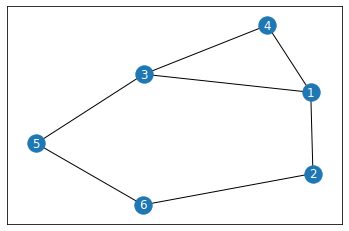

In [15]:
positioning = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, positioning)
nx.draw_networkx_edges(graph, positioning)
nx.draw_networkx_labels(graph, positioning, font_color='white')
plt.show()

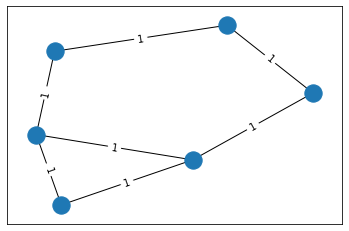

In [16]:
positioning = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, positioning)
nx.draw_networkx_edges(graph, positioning)
nx.draw_networkx_edge_labels(graph, positioning, edge_labels={key:'1' for key in graph.edges}, font_color='black')
plt.show()

## Building Ising model

<img src="hamiltonian.png" width="200px" height="20px" />

In [17]:
h = defaultdict(int)
J = defaultdict(int)

for edge in graph.edges:
    J[edge] += 1
    
print(h_J_matrix.from_hJN(h, J, N))

[[0 1 1 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


## Solving classically

In [18]:
response = dimod.ExactSolver().sample_ising(h, J)
solution = np.array(list(response.first.sample.values()))

In [19]:
print(solution)

[ 1 -1  1 -1 -1  1]


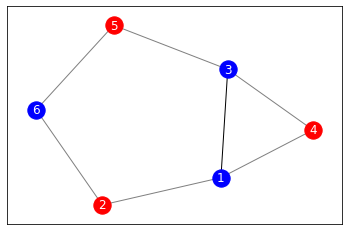

In [20]:
positioning = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, positioning, nodelist=[node for node in graph.nodes if solution[node-1]==1], node_color='blue')
nx.draw_networkx_nodes(graph, positioning, nodelist=[node for node in graph.nodes if solution[node-1]==-1], node_color='red')
nx.draw_networkx_edges(graph, positioning, edgelist=[edge for edge in graph.edges if solution[edge[0]-1] != solution[edge[1]-1]], edge_color='grey')
nx.draw_networkx_edges(graph, positioning, edgelist=[edge for edge in graph.edges if solution[edge[0]-1] == solution[edge[1]-1]], edge_color='black')
nx.draw_networkx_labels(graph, positioning, font_color='white')
plt.show()

## Solving with Quantum Annealer

In [21]:
sampler = EmbeddingComposite(DWaveSampler(sampler='Advantage2_prototype1.1'))
response = sampler.sample_ising(
    h,
    J,
    chain_strength=1.5,
    num_reads=10,
    label='Demo: MaxCut'
)

In [22]:
print(f'Solution: {np.array(list(response.first.sample.values()))}')
print(f'Energy: {response.first.energy}')

Solution: [-1  1 -1  1  1 -1]
Energy: -5.0


In [23]:
dwave.inspector.show(response)

'http://127.0.0.1:18000/?problemId=48f93251-f27e-45f8-9800-6033fb9997d0'

In [24]:
response.to_serializable()

{'type': 'SampleSet',
 'version': {'sampleset_schema': '3.1.0'},
 'num_variables': 6,
 'num_rows': 2,
 'sample_data': {'type': 'array',
  'data': [[26], [37]],
  'data_type': 'uint32',
  'shape': (2, 1),
  'use_bytes': False},
 'sample_type': 'int8',
 'sample_packed': True,
 'vectors': {'energy': {'type': 'array',
   'data': [-5.0, -5.0],
   'data_type': 'float64',
   'shape': (2,),
   'use_bytes': False},
  'num_occurrences': {'type': 'array',
   'data': [3, 7],
   'data_type': 'int32',
   'shape': (2,),
   'use_bytes': False},
  'chain_break_fraction': {'type': 'array',
   'data': [0.0, 0.0],
   'data_type': 'float64',
   'shape': (2,),
   'use_bytes': False}},
 'variable_labels': [1, 2, 3, 4, 5, 6],
 'variable_type': 'SPIN',
 'info': {'timing': {'qpu_sampling_time': 953.2,
   'qpu_anneal_time_per_sample': 20.0,
   'qpu_readout_time_per_sample': 54.78,
   'qpu_access_time': 16015.56,
   'qpu_access_overhead_time': 1104.44,
   'qpu_programming_time': 15062.36,
   'qpu_delay_time_per_s

=====================================================================================================

## Solving larger instance

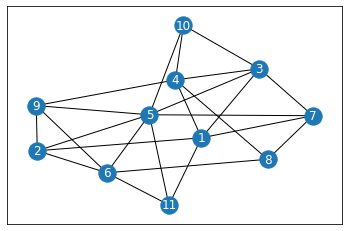

      1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
142  +1 -1 -1 +1 +1 +1 -1 -1 -1 -1 -1  -12.0       1
145  +1 -1 -1 +1 +1 +1 +1 -1 -1 -1 -1  -12.0       1
212  -1 +1 +1 +1 -1 +1 +1 -1 -1 -1 +1  -12.0       1
812  -1 +1 -1 +1 -1 +1 +1 -1 -1 +1 +1  -12.0       1
1409 +1 -1 -1 -1 +1 -1 -1 +1 +1 +1 -1  -12.0       1
1476 -1 +1 +1 -1 -1 -1 -1 +1 +1 +1 +1  -12.0       1
1499 -1 +1 +1 -1 -1 -1 +1 +1 +1 +1 +1  -12.0       1
1657 +1 -1 +1 -1 +1 -1 -1 +1 +1 -1 -1  -12.0       1
43   -1 +1 +1 +1 -1 -1 +1 -1 -1 -1 +1  -10.0       1
83   -1 +1 -1 +1 +1 -1 +1 -1 -1 -1 +1  -10.0       1
137  +1 -1 +1 +1 +1 +1 -1 -1 -1 -1 -1  -10.0       1
144  -1 -1 -1 +1 +1 +1 +1 -1 -1 -1 -1  -10.0       1
147  -1 +1 -1 +1 +1 +1 +1 -1 -1 -1 -1  -10.0       1
211  -1 +1 -1 +1 -1 +1 +1 -1 -1 -1 +1  -10.0       1
235  -1 +1 +1 +1 -1 +1 +1 -1 -1 -1 -1  -10.0       1
468  -1 +1 +1 +1 -1 -1 +1 -1 +1 -1 +1  -10.0       1
548  -1 +1 +1 -1 -1 -1 +1 -1 +1 +1 +1  -10.0       1
556  -1 +1 -1 +1 -1 -1 +1 -1 +1 +1 +1  -10.0  

In [66]:
graph2 = nx.Graph()
graph2.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (2, 5), (5, 6), (2, 6), (3, 7), (1, 7), (5, 7), (6, 8), (7, 8), (4, 8), (5, 9), (5, 10), (5, 11), (4, 9), (6, 9), (2, 9), (3, 10), (4, 10), (5, 10), (6, 11), (1, 11)])
N = len(graph2.nodes)
positioning = nx.spring_layout(graph2)
nx.draw_networkx_nodes(graph2, positioning)
nx.draw_networkx_edges(graph2, positioning)
nx.draw_networkx_labels(graph2, positioning, font_color='white')
plt.show()

h2 = defaultdict(int)
J2 = defaultdict(int)

for edge in graph2.edges:
    J2[edge] += 1


response = dimod.ExactSolver().sample_ising(h2, J2)
solution = np.array(list(response.first.sample.values()))
print(response)

In [67]:
sampler2 = EmbeddingComposite(DWaveSampler(sampler='Advatage2_prototype1.1'))
response2 = sampler2.sample_ising(
    h2,
    J2,
    chain_strength=1.5,
    num_reads=10,
    label='Demo: MaxCut'
)
print(f'Solution: {np.array(list(response2.first.sample.values()))}')
print(f'Energy: {response2.first.energy}')

Solution: [ 1 -1 -1  1  1  1 -1 -1 -1 -1 -1]
Energy: -12.0
      1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
142  +1 -1 -1 +1 +1 +1 -1 -1 -1 -1 -1  -12.0       1
145  +1 -1 -1 +1 +1 +1 +1 -1 -1 -1 -1  -12.0       1
212  -1 +1 +1 +1 -1 +1 +1 -1 -1 -1 +1  -12.0       1
812  -1 +1 -1 +1 -1 +1 +1 -1 -1 +1 +1  -12.0       1
1409 +1 -1 -1 -1 +1 -1 -1 +1 +1 +1 -1  -12.0       1
1476 -1 +1 +1 -1 -1 -1 -1 +1 +1 +1 +1  -12.0       1
1499 -1 +1 +1 -1 -1 -1 +1 +1 +1 +1 +1  -12.0       1
1657 +1 -1 +1 -1 +1 -1 -1 +1 +1 -1 -1  -12.0       1
43   -1 +1 +1 +1 -1 -1 +1 -1 -1 -1 +1  -10.0       1
83   -1 +1 -1 +1 +1 -1 +1 -1 -1 -1 +1  -10.0       1
137  +1 -1 +1 +1 +1 +1 -1 -1 -1 -1 -1  -10.0       1
144  -1 -1 -1 +1 +1 +1 +1 -1 -1 -1 -1  -10.0       1
147  -1 +1 -1 +1 +1 +1 +1 -1 -1 -1 -1  -10.0       1
211  -1 +1 -1 +1 -1 +1 +1 -1 -1 -1 +1  -10.0       1
235  -1 +1 +1 +1 -1 +1 +1 -1 -1 -1 -1  -10.0       1
468  -1 +1 +1 +1 -1 -1 +1 -1 +1 -1 +1  -10.0       1
548  -1 +1 +1 -1 -1 -1 +1 -1 +1 +1 +1  -

ValueError: invalid combination of arguments provided: if data capture not enabled, problem/response/solver have to be specified; also, make sure a structured problem is being inspected

In [68]:

print(response2)
dwave.inspector.show(response2)

   1  2  3  4  5  6  7  8  9 10 11 energy num_oc. chain_.
0 +1 -1 -1 +1 +1 +1 -1 -1 -1 -1 -1  -12.0       3     0.0
1 -1 +1 -1 +1 -1 +1 +1 -1 -1 +1 +1  -12.0       1     0.0
2 +1 -1 -1 +1 +1 +1 +1 -1 -1 -1 -1  -12.0       2     0.0
3 +1 -1 +1 -1 +1 -1 -1 +1 +1 -1 -1  -12.0       1     0.0
4 +1 -1 -1 -1 +1 -1 -1 +1 +1 +1 -1  -12.0       1     0.0
5 -1 +1 +1 -1 -1 -1 -1 +1 +1 +1 +1  -12.0       1     0.0
6 -1 +1 +1 -1 -1 -1 +1 +1 +1 +1 +1  -12.0       1     0.0
['SPIN', 7 rows, 10 samples, 11 variables]


'http://127.0.0.1:18000/?problemId=4bb95da6-a3e6-4880-b261-1455343464d9'